In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hmean
from collections import defaultdict

In [5]:
def extract_accuracy_from_log(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
        # 正規表現を使用してaccuracyを抽出
        match = re.search(r'accuracy: (\d+\.\d+)%', content)
        if match:
            return float(match.group(1))
    return None


In [6]:
datasets = [
    "caltech101", "dtd", "eurosat", "fgvc_aircraft", "food101", "oxford_flowers", "oxford_pets",  "sun397"
]

seeds = ["seed1", "seed2", "seed3"]

#targets = ["max", "min", "median", "q1", "q3"]
targets = ["max", "q1", "median", "q3", "min"]

for dataset in datasets:
    print(f"### {dataset} ###")

    for target in targets:
        cfg = f"vit_b16_c4_ep10_batch1_ctxv1_zhou_etran_{target}"
        accuracies = defaultdict(list)
        for seed in seeds:
            train_path = f"output/base2new/train_base/{dataset}/shots_1/DoCoCoOp/{cfg}/{seed}/log.txt"
            test_path = f"output/base2new/test_new/{dataset}/shots_1/DoCoCoOp/{cfg}/{seed}/log.txt"

            if os.path.exists(train_path) and os.path.exists(test_path):
                accuracy_train = extract_accuracy_from_log(train_path)
                accuracy_test = extract_accuracy_from_log(test_path)

                accuracies["train"].append(accuracy_train)
                accuracies["test"].append(accuracy_test)

                print(f"{target}: train accuracy ({seed}) is {accuracy_train}")
                print(f"{target}: test accuracy ({seed}) is {accuracy_test}")

        mean_train = np.round(np.mean(accuracies["train"]),2)
        std_train = np.round(np.std(accuracies["train"]), 2)

        mean_test = np.round(np.mean(accuracies["test"]),2)
        std_test = np.round(np.std(accuracies["test"]), 2)

        harmonic = hmean([mean_test, mean_train])
        harmonic = np.round(harmonic, 2)

        print(f"{target}: Harmonic mean is {harmonic}")
        #print(f"{target}: Train mean is {mean_train}")
    print("  ")



### caltech101 ###
max: train accuracy (seed1) is 96.6
max: test accuracy (seed1) is 94.0
max: train accuracy (seed2) is 96.8
max: test accuracy (seed2) is 93.4
max: train accuracy (seed3) is 97.4
max: test accuracy (seed3) is 93.0
max: Harmonic mean is 95.17
q1: train accuracy (seed1) is 94.1
q1: test accuracy (seed1) is 93.3
q1: train accuracy (seed2) is 97.2
q1: test accuracy (seed2) is 92.7
q1: train accuracy (seed3) is 96.1
q1: test accuracy (seed3) is 93.3
q1: Harmonic mean is 94.43
median: train accuracy (seed1) is 97.7
median: test accuracy (seed1) is 94.8
median: train accuracy (seed2) is 97.6
median: test accuracy (seed2) is 93.9
median: train accuracy (seed3) is 97.3
median: test accuracy (seed3) is 93.2
median: Harmonic mean is 95.72
q3: train accuracy (seed1) is 97.3
q3: test accuracy (seed1) is 93.0
q3: train accuracy (seed2) is 94.3
q3: test accuracy (seed2) is 94.0
q3: train accuracy (seed3) is 97.5
q3: test accuracy (seed3) is 92.6
q3: Harmonic mean is 94.76
min: train

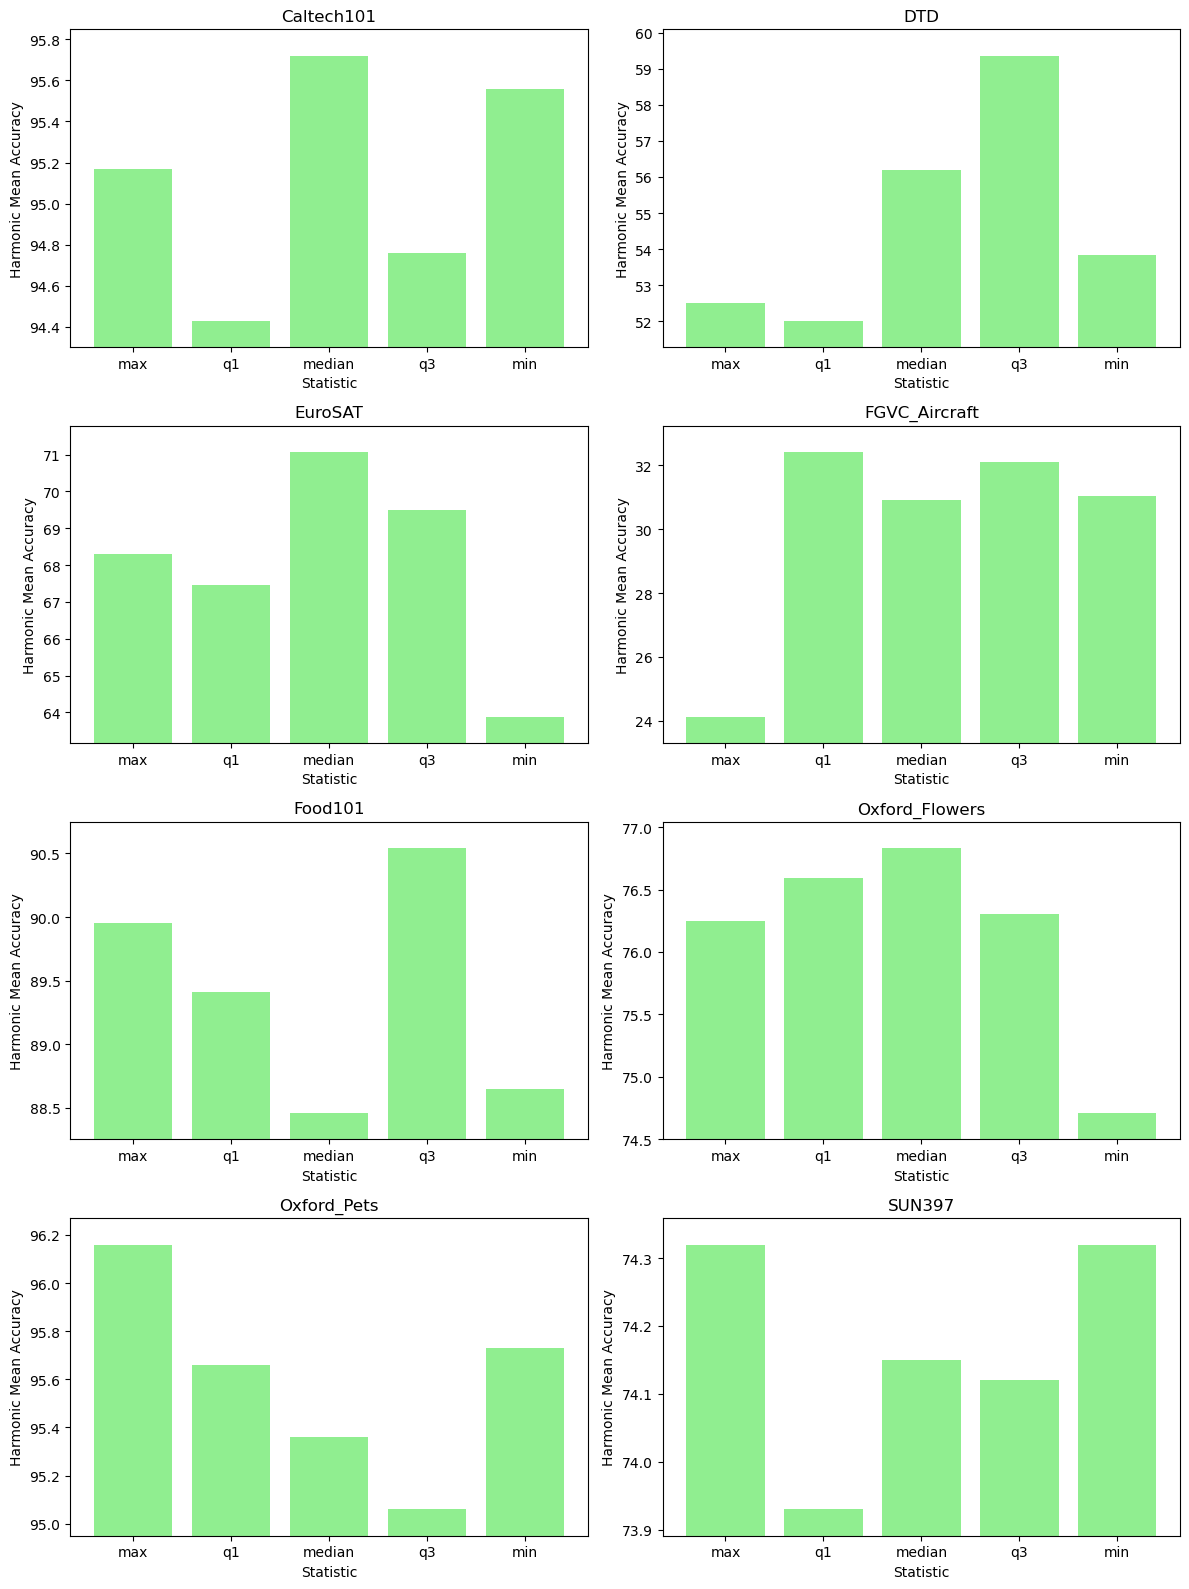

In [3]:
# Updated data with additional datasets
datasets = {
    "Caltech101": {"max": 95.17, "q1": 94.43, "median": 95.72, "q3": 94.76, "min": 95.56},
    "DTD": {"max": 52.5, "q1": 52.02, "median": 56.2, "q3": 59.36, "min": 53.84},
    "EuroSAT": {"max": 68.3, "q1": 67.47, "median": 71.07, "q3": 69.5, "min": 63.88},
    "FGVC_Aircraft": {"max": 24.13, "q1": 32.41, "median": 30.91, "q3": 32.11, "min": 31.04},
    "Food101": {"max": 89.95, "q1": 89.41, "median": 88.46, "q3": 90.54, "min": 88.65},
    "Oxford_Flowers": {"max": 76.25, "q1": 76.59, "median": 76.83, "q3": 76.3, "min": 74.71},
    "Oxford_Pets": {"max": 96.16, "q1": 95.66, "median": 95.36, "q3": 95.06, "min": 95.73},
    "SUN397": {"max": 74.32, "q1": 73.93, "median": 74.15, "q3": 74.12, "min": 74.32}
}

# Create a bar chart for each dataset, adjusting the y-axis for better comparison
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # Adjust layout to fit all plots
for ax, (dataset_name, scores) in zip(axes.flatten(), datasets.items()):
    categories = list(scores.keys())
    values = list(scores.values())
    ax.bar(categories, values, color='lightgreen')
    ax.set_title(dataset_name)
    ax.set_xlabel('Statistic')
    ax.set_ylabel('Harmonic Mean Accuracy')
    min_val = min(values)
    max_val = max(values)
    ax.set_ylim(min_val - (max_val - min_val) * 0.1, max_val + (max_val - min_val) * 0.1)  # Scale each plot for clarity

plt.tight_layout()
plt.show()
